<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/HW1_VicenteDeLeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Step 1 - Data

## Kaggle - Retail Transaction Data

This dataset offers a comprehensive dataset of retail transactions, providing valuable insights into consumer behavior, product preferences, pricing strategies, and regional trends within the retail environment. Analyzing this data facilitates a deeper understanding of purchasing patterns, enabling businesses to optimize marketing strategies, and empowering decision-makers to drive growth and enhance profitability in the dynamic retail landscape.

Fields:

- CustomerID: Unique identifier for each customer.
- ProductID: Unique identifier for each product.
- Quantity: The number of units purchased for a particular product.
- Price: The unit price of the product.
- TransactionDate: Date and time when the transaction occurred.
- PaymentMethod: The method used by the customer to make the payment.
- StoreLocation: The location where the transaction took place.
- ProductCategory: Category to which the product belongs.
- DiscountApplied(%): Percentage of the discount applied to the product.
- TotalAmount: Total amount paid for the transaction.


Kaggle Data Source: https://www.kaggle.com/datasets/fahadrehman07/retail-transaction-dataset

By: Fahad Rehman

Updated 5 months ago (can't find dataset creation date).

In [2]:
df = pd.read_csv('/content/Retail_Transaction_Dataset.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


# Step 2 - Data Quality

- Check for data size (rows x columns), and data types (integer, strings, dates, etc.)
- Provide overall descriptive statistics (e.g. mean, median, totals)
Assess missing data. If your data does not contain any missing values, you will just have zero NA.
- Provide both quantitative and visual assessment (using naniar library or other libraries).

In [7]:
rows = len(df.axes[0]) # getting the number of rows

cols = len(df.axes[1]) # getting the number of columns

print(f"The Retail Transaction Data has {rows} rows and {cols} columns.")

The Retail Transaction Data has 100000 rows and 10 columns.


Checking data types:

In [11]:
print(df.dtypes)

CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object


From the above data types within df, we see that "TransactionDate" is and object and we should conver that into datetime.

In [12]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # converting to datetime
print(df.dtypes) # let's check it one more time

CustomerID                     int64
ProductID                     object
Quantity                       int64
Price                        float64
TransactionDate       datetime64[ns]
PaymentMethod                 object
StoreLocation                 object
ProductCategory               object
DiscountApplied(%)           float64
TotalAmount                  float64
dtype: object


Checking for missing values:

In [13]:
df.isnull().sum() # we have 0 missing values

,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


Checking for duplicates:

In [14]:
df.duplicated().sum() # we have 0 duplicates

0

This dataset is not lacking of missing and duplicate values. I've worked with some crazy datasets before where I had to replace missing data with mean or median values. I think this will be a challenge with the data collection/engineering I will be dealing at work. For pricing for example, I don't think (I might be wrong) I could replace $0.00 with mean or median because sometimes we don't have pricing values for some items. It depends if this will help my models accuracy or not, I have to ask, research, and try to see what would be my best option. I will be creating crazy datasets that will need tons of data quality validation and analysis. I like how this course reminds me how important the basics are!

**Summary Statistics in Numerical Data**

In [19]:
summary_numeric = df[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']].describe()
summary_numeric

,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.009290,55.067344,10.020155,248.334955
std,2.579808,25.971567,5.779534,184.554792
min,1.000000,10.000430,0.000046,8.274825
25%,3.000000,32.549474,5.001013,95.163418
50%,5.000000,55.116789,10.030353,200.368393
75%,7.000000,77.456763,15.018367,362.009980
max,9.000000,99.999284,19.999585,896.141242


- The above summary statistics in numerical columns show sthat the wide range of prices and total amounts (shown in STD) indicates substantial variation in what customers purchase. There are outliers with high amounts spent in some transactions, which might be worth investigating further.

- Discounts are relatively moderate, with most falling between 5% and 15%. Very few transactions have either no discount or a maximum discount of 20%.

- It seems customers typically buy between 3 and 7 items per transaction, suggesting that the dataset might reflect a mix of high and smaller purchases.

# Step 3 - Data Visualization



## One Dimensional -> Histogram

Barplots -> Using Week3 Colab notes to build this as well as the color.

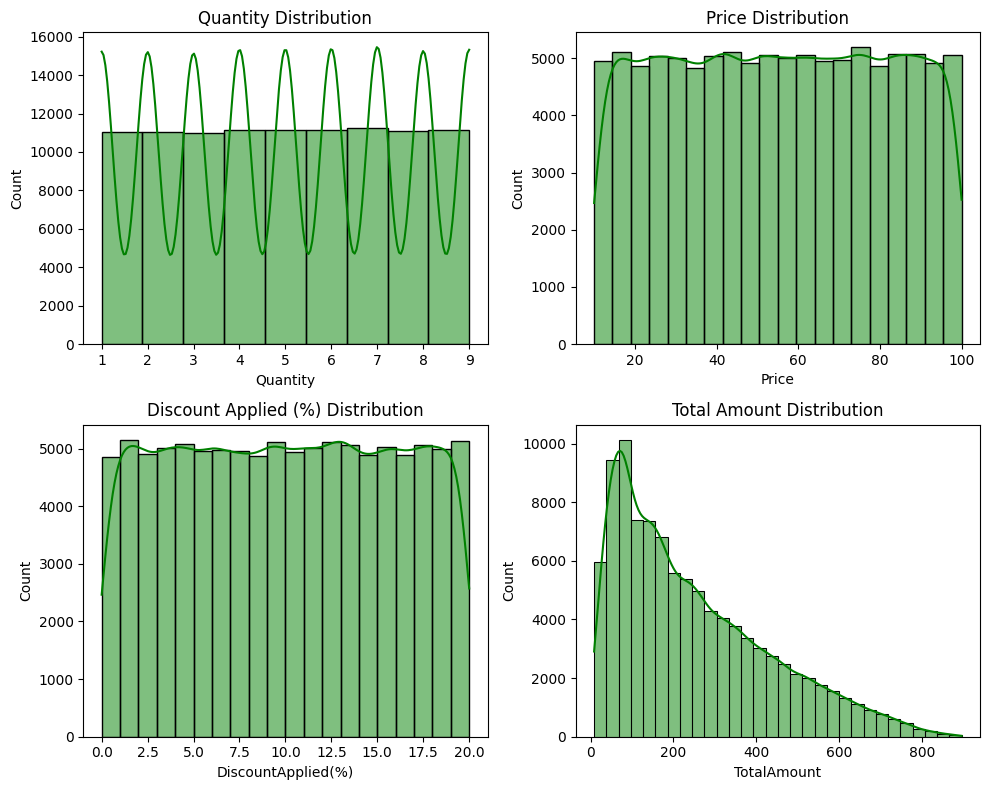

In [26]:
plt.figure(figsize=(10,8))

# Subplot 1 -> Quantity Distribution
plt.subplot(2, 2, 1) # two rows, two colums, first plot
sns.histplot(df['Quantity'], kde = True, bins = 9, color = 'green')
plt.title('Quantity Distribution')

# Subplot 2 -> Price Distirbution
plt.subplot(2, 2, 2) # two rows, two colums, second plot
sns.histplot(df['Price'], kde = True, bins = 20, color = 'green')
plt.title('Price Distribution')

# Subplot 3 -> Discount Applied Distribution
plt.subplot(2, 2, 3) # two rows, two colums, third plot
sns.histplot(df['DiscountApplied(%)'], kde = True, bins = 20, color = 'green')
plt.title('Discount Applied (%) Distribution')

# Subplot 4 -> Total Amount Distribution
plt.subplot(2, 2, 4) # two rows, two colums, fourth plot
sns.histplot(df['TotalAmount'], kde = True, bins = 30, color = 'green')
plt.title('Total Amount Distribution')

plt.tight_layout()
plt.show()

The above histogram shows:

- Quantity Distribution: appears to be uniform, with a slight peak at each quantity level from 1 to 9. This likely indicates that customers are evenly distributed across purchasing different quantities of products. Those peaks may suggest that customers tend to buy items in specific quantities.


- Price Distribution: appears flat and uniform, indicating that products are evenly priced across the range of 10 to 100. Also, there’s no particular concentration around a specific price point, which suggests that there are no dominant price bands customers are purchasing items across the entire price range.


- Discount Applied Distribution: also similarly flat, meaning discounts are uniformly applied across transactions, ranging from 0% to almost 20%. This implies that customers are offered a consistent range of discounts, with no bias towards certain discount percentages.



- Total Amount Distribution: This is right-skewed, meaning that the majority of transactions have lower total amounts (around 200 or less), but there are some transactions with much higher totals (up to 800). This suggests that while most customers make smaller purchases, there are some higher-value transactions that skew the distribution.

## Comparison Visualization: Box Plot

Price and TotalAmount by ProductCategory

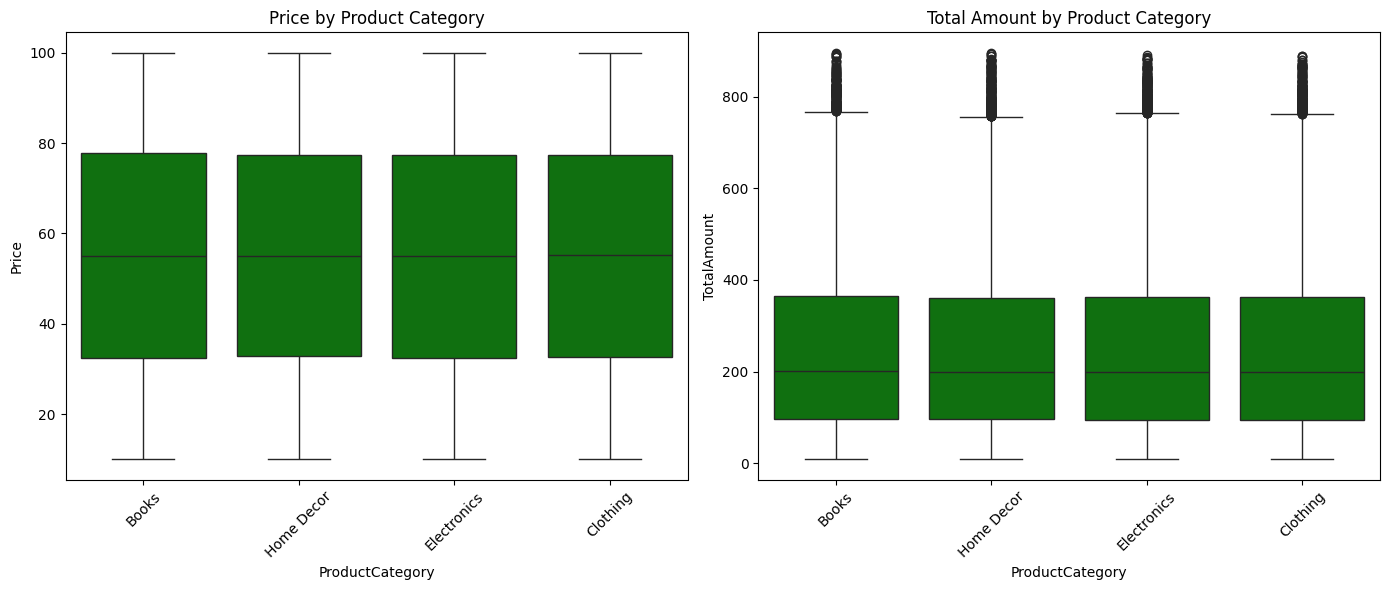

In [27]:
plt.figure(figsize=(14,6))

# Subplot 1 -> Price by ProductCategory
plt.subplot(1, 2, 1)
sns.boxplot(x = 'ProductCategory', y = 'Price', data = df, color = 'green')
plt.title('Price by Product Category')
plt.xticks(rotation = 45)

# Subplot 2 -> TotalAmount by ProductCategory
plt.subplot(1, 2, 2)
sns.boxplot(x = 'ProductCategory', y = 'TotalAmount', data = df, color = 'green')
plt.title('Total Amount by Product Category')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

**Price by Product Category**

- Price by Product Category: The median prices for the different product categories like books, home decor, electronics, and clothing are mostly consistent, around the mid point of the y axis.

- Interquartile Range (IQR): The range between the 25th and 75th percentiles for each category is relatively similar, suggesting that the price distribution across categories is not super different.

No significant outliers beyond the whiskers.


**Total Amount by Product Category**
- Shows a wider distribution compared to the price plot, with larger variances and some potential outliers.

- Outliers: The plot includes several outliers for each category, particularly at the higher end of the total amount scale, suggesting that while most of the data points are within the expected range, there are occasional purchases with very high total amounts.


While the medians across the categories are again similar, the change in total amount is far greater than in the price, showing that the total amount likely depends not just on price but also on the quantity purchased.





## Two Dimensional Vsualizations (Scatterplot vs BarPlot)

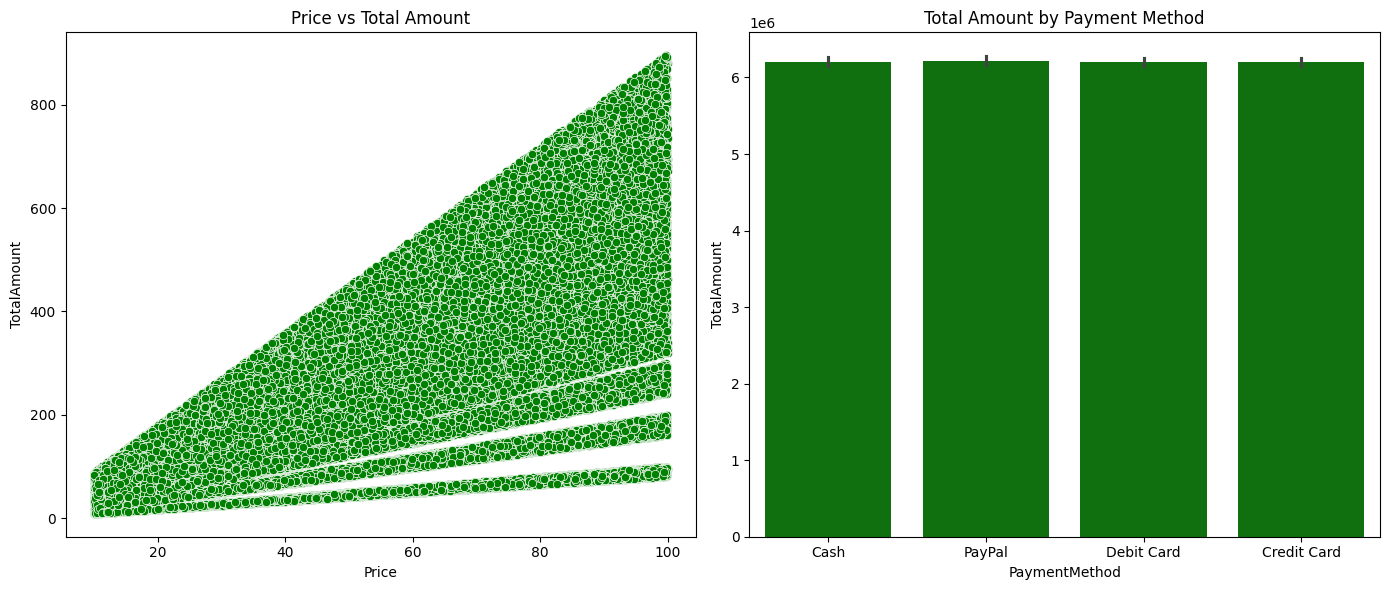

In [28]:
plt.figure(figsize=(14,6))

# Subplot 1 -> Scatter Plot for Price vs Total Amount
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Price', y = 'TotalAmount', data = df, color = 'green')
plt.title('Price vs Total Amount')

# Subplot 2 -> Bar Plot for Total Amount by Payment Method
plt.subplot(1, 2, 2)
sns.barplot(x = 'PaymentMethod', y = 'TotalAmount', data = df, color = 'green', estimator = sum)
plt.title('Total Amount by Payment Method')

plt.tight_layout()
plt.show()

**Scatter Plot**

- The above scatter plot shows a triangular pattern where higher prices correlate with higher total amounts. Something like this can be expected, as higher priced products typically result in a higher total amount.

- The plot exhibits distinct bands of dots, which could suggest that for specific price ranges, there are consistent quantities purchased, leading to these clearly defined bands. For example, lower prices may relate to multiple items being purchased, explaining the range of total amounts within certain price bands.

- Also, the overall pattern seems to suggest a direct, positive relationship between price and total amount.


**Bar Plot**

- No single payment method stands out as contributing more to total amounts, meaning customers are spending similar amounts regardless of how they pay.

- The choice of payment method does not significantly impact the total amount spent.

# Sources:
- Data analysis: https://www.geeksforgeeks.org/count-the-number-of-rows-and-columns-of-a-pandas-dataframe/

- Data analysis: https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/

- Datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

- Boxplots: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

- KDE: https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

- barplot: https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/

- scatter plots: https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/

- Colab Week 3: https://colab.research.google.com/drive/1Ru-Lm8m6plvhBbvnGeMQeR6U03GZ7QdZ#scrollTo=1utU5KVpJ65q